In [2]:
import os
import zipfile

# Ruta completa al archivo .zip
zip_file = r"C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco-2017-dataset.zip"

# Directorio donde se extraerán los archivos
extract_dir = "coco_dataset"
# Crear el directorio de extracción si no existe
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extraer el archivo .zip
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(path=extract_dir)
    #print(f"Archivo {zip_file} extraído correctamente en {extract_dir}")
except Exception as e:
    print(f"Error al extraer el archivo: {e}")

Imagen: 000000529015.jpg, Tamaño: 640x480
Imagen: 000000224288.jpg, Tamaño: 640x359
Imagen: 000000332807.jpg, Tamaño: 500x375
Imagen: 000000308835.jpg, Tamaño: 500x335
Imagen: 000000379587.jpg, Tamaño: 640x405


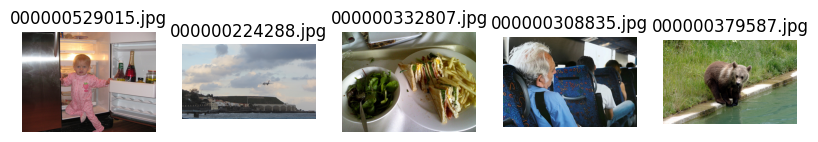

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
train_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\test2017'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Seleccionar 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(train_dir, image_file))
    width, height = img.size
    print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
plt.show()

In [2]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset'

# creamos un nuevo directorio
os.mkdir(ruta)

In [3]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images'

# creamos un nuevo directorio
os.mkdir(ruta)

In [4]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\labels'

# creamos un nuevo directorio
os.mkdir(ruta)

In [5]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\labels\train2017'

# creamos un nuevo directorio
os.mkdir(ruta)

In [6]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\labels\val2017'

# creamos un nuevo directorio
os.mkdir(ruta)

In [1]:
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\annotations\instances_train2017.json'
output_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\train2017'
images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\train2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        #print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        #print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")

Conversión completada.


In [2]:

# Rutas
coco_annotations_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\annotations\instances_val2017.json'
output_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\val2017'
images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\val2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        #print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        #print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")

Conversión completada.


In [3]:
import shutil

# Ruta de la carpeta de origen
source_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\train2017'

# Ruta de destino
destination_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images'

# Mover la carpeta
shutil.move(source_path, destination_path)

print("Carpeta movida con éxito.")

Carpeta movida con éxito.


In [4]:
import shutil

# Ruta de la carpeta de origen
source_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\coco_dataset\coco2017\val2017'

# Ruta de destino
destination_path = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images'

# Mover la carpeta
shutil.move(source_path, destination_path)

print("Carpeta movida con éxito.")

Carpeta movida con éxito.


In [1]:
import os

# Directorios de imágenes y etiquetas
train_images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\train2017'
train_labels_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\train2017'
val_images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\val2017'
val_labels_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\val2017'

# Función para obtener la lista de archivos sin la extensión
def obtener_archivos_sin_extension(directorio, extension):
    archivos = [os.path.splitext(f)[0] for f in os.listdir(directorio) if f.endswith(extension)]
    return set(archivos)

# Obtener los archivos de imágenes y etiquetas (sin extensión)
train_images = obtener_archivos_sin_extension(train_images_dir, '.jpg')
train_labels = obtener_archivos_sin_extension(train_labels_dir, '.txt')
val_images = obtener_archivos_sin_extension(val_images_dir, '.jpg')
val_labels = obtener_archivos_sin_extension(val_labels_dir, '.txt')

# Comparar imágenes y etiquetas en train y val
imagenes_sin_etiquetas_train = train_images - train_labels
imagenes_sin_etiquetas_val = val_images - val_labels

# Mostrar imágenes sin etiquetas sin eliminarlas
print(f'Imágenes sin etiquetas en train: {len(imagenes_sin_etiquetas_train)}')
print(f'Imágenes sin etiquetas en val: {len(imagenes_sin_etiquetas_val)}')

# Eliminar imágenes sin etiquetas en train
if imagenes_sin_etiquetas_train:
    print('Eliminando imágenes sin etiquetas en train:')
    for img in imagenes_sin_etiquetas_train:
        img_path = os.path.join(train_images_dir, img + '.jpg')
        print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

# Eliminar imágenes sin etiquetas en val
if imagenes_sin_etiquetas_val:
    print('Eliminando imágenes sin etiquetas en val:')
    for img in imagenes_sin_etiquetas_val:
        img_path = os.path.join(val_images_dir, img + '.jpg')
        print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

Imágenes sin etiquetas en train: 0
Imágenes sin etiquetas en val: 0


In [2]:
import os

# Directorio de las imágenes
images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\train2017'

# Directorio donde se guardará el archivo train2017.txt
output_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset'

# Nombre del archivo de salida
output_file = 'train2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(images_dir):
    image_paths = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith('.jpg'):
            # Construimos la ruta absoluta de la imagen
            image_path = os.path.join(images_dir, image_file)
            # Convertimos la ruta a formato adecuado para evitar errores de barras invertidas
            image_path = image_path.replace('\\', '/')
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo train2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")

Se ha creado el archivo train2017.txt con 70548 rutas de imágenes.


In [3]:
import os

# Directorio de las imágenes
images_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\val2017'

# Directorio donde se guardará el archivo train2017.txt
output_dir = r'C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset'

# Nombre del archivo de salida
output_file = 'val2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(images_dir):
    image_paths = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith('.jpg'):
            # Construimos la ruta absoluta de la imagen
            image_path = os.path.join(images_dir, image_file)
            # Convertimos la ruta a formato adecuado para evitar errores de barras invertidas
            image_path = image_path.replace('\\', '/')
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo train2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")

Se ha creado el archivo val2017.txt con 2969 rutas de imágenes.


In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(2, 2).to(device)
print(tensor.device)
device = torch.device('cuda:0')  # Forzar uso de la primera GPU NVIDIA

cuda:0


In [2]:
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

Note: you may need to restart the kernel to use updated packages.


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


In [2]:
!pip install ultralytics

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 15.7 GB RAM, 707.3/952.8 GB disk)


In [1]:
!pip install torch
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(2, 2).to(device)
print(tensor.device)

print(torch.cuda.device_count())  # Imprime el número de GPUs disponibles

cuda:0
1


In [3]:
!nvidia-smi

Thu Oct 17 07:41:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   47C    P8             10W /   45W |     184MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
from ultralytics import YOLO
import torch

# Verificar si la GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo YOLOv8 para detección
model = YOLO('yolo11n.pt')

# Mover el modelo a la GPU si está disponible
model = model.to(device)

# Imprimir el dispositivo utilizado (cuda o cpu)
print("Usando el dispositivo:", device)

# Entrenar el modelo en la GPU
model.train(data=r'CompleteCOCO.yaml', epochs=20, imgsz=640, workers=2)

Usando el dispositivo: cuda
New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=CompleteCOCO.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=2, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/luisangelolveraolvera/general/059a0245e2944745b23ea9475dd0cab1

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\User\\Documents\\JUPYTER_LOCAL\\IMAGENES_ENTRENAMIENTO\\DETECCION\\COCO_REDUCIDO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed 


train: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\train2017.cache... 70548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70548/70548 [00:00<?, ?it/s]

train: WARNING  C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\train2017\000000099844.jpg: 2 duplicate labels removed



val: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\val2017.cache... 2969 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2969/2969 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs\detect\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.49G      1.199      1.042      1.211         13        640: 100%|██████████| 4410/4410 [14:49<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:23<00:00,  3.92it/s]


                   all       2969      13766      0.651      0.487      0.547      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.69G      1.311      1.209      1.286         72        640: 100%|██████████| 4410/4410 [14:48<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:20<00:00,  4.57it/s]


                   all       2969      13766       0.66       0.45      0.513      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.35G      1.407      1.366      1.356         32        640: 100%|██████████| 4410/4410 [14:27<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.85it/s]


                   all       2969      13766      0.605      0.406      0.461      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.21G      1.419      1.383      1.369         12        640: 100%|██████████| 4410/4410 [14:57<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.83it/s]


                   all       2969      13766      0.677      0.428        0.5      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.33G      1.367      1.303      1.335         19        640: 100%|██████████| 4410/4410 [14:05<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.79it/s]


                   all       2969      13766       0.66      0.468       0.54      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.21G      1.329      1.246      1.309         24        640: 100%|██████████| 4410/4410 [13:34<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.86it/s]


                   all       2969      13766      0.683      0.502      0.564      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.35G      1.304      1.208      1.291         39        640: 100%|██████████| 4410/4410 [13:44<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.78it/s]


                   all       2969      13766      0.674      0.515      0.575      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.52G      1.286      1.182       1.28         14        640: 100%|██████████| 4410/4410 [13:41<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.89it/s]


                   all       2969      13766      0.702      0.523      0.594      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.29G      1.267      1.155      1.266         22        640: 100%|██████████| 4410/4410 [13:46<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.92it/s]


                   all       2969      13766      0.692      0.539      0.603      0.392

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.17G      1.248      1.129      1.255         32        640: 100%|██████████| 4410/4410 [14:12<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.71it/s]


                   all       2969      13766       0.73      0.537       0.61      0.401
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.78G      1.242      1.065      1.243         21        640: 100%|██████████| 4410/4410 [13:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.81it/s]


                   all       2969      13766      0.723      0.539       0.61      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.8G      1.224      1.039       1.23          5        640: 100%|██████████| 4410/4410 [12:43<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.82it/s]


                   all       2969      13766      0.734      0.541      0.616      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.8G      1.208      1.016       1.22         23        640: 100%|██████████| 4410/4410 [12:40<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.75it/s]


                   all       2969      13766      0.722      0.548      0.619      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.82G      1.192     0.9944      1.209         19        640: 100%|██████████| 4410/4410 [12:41<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.75it/s]


                   all       2969      13766      0.725      0.548      0.622       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.81G      1.175     0.9696      1.196         25        640: 100%|██████████| 4410/4410 [12:51<00:00,  5.72it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.73it/s]


                   all       2969      13766      0.733      0.546      0.626      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.81G      1.159     0.9485      1.187         19        640: 100%|██████████| 4410/4410 [13:09<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.76it/s]


                   all       2969      13766      0.731       0.55      0.628      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.86G      1.144     0.9267      1.177          5        640: 100%|██████████| 4410/4410 [12:54<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.85it/s]


                   all       2969      13766      0.736      0.548      0.631      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.79G      1.128     0.9048      1.165          9        640: 100%|██████████| 4410/4410 [12:50<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.81it/s]


                   all       2969      13766      0.751      0.543      0.633      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.78G      1.111     0.8826      1.156         30        640: 100%|██████████| 4410/4410 [12:52<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.78it/s]


                   all       2969      13766      0.744      0.552      0.635      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.83G      1.097     0.8635      1.146         18        640: 100%|██████████| 4410/4410 [12:55<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:25<00:00,  3.65it/s]


                   all       2969      13766      0.748      0.552      0.637      0.422

20 epochs completed in 4.638 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 5.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:21<00:00,  4.39it/s]


                   all       2969      13766      0.746      0.554      0.638      0.422
                person       2693      11004      0.794      0.652       0.75      0.513
               bicycle        149        316        0.7      0.361      0.434      0.247
                   car        535       1932      0.675      0.518      0.568      0.353
            motorcycle        159        371       0.76      0.528      0.646      0.402
              airplane         97        143      0.803      0.711       0.79      0.598
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train4


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : peculiar_estuary_5445
COMET INFO:     url                   : https://www.comet.com/luisangelolveraolvera/general/059a0245e2944745b23ea9475dd0cab1
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [21]               : (0.0005950000000000005, 0.009009318972033258)
COMET INFO:     lr/pg1 [21]               : (0.0005950000000000005, 0.009009318972033258)
COMET INFO:     lr/pg2 [21]               : (0.0005950000000000005, 0.009009318972033258)
COMET INFO:     metrics/mAP50(B) [21]     : (0.46076, 0.6375435282222984)
COMET INFO:     metrics/mAP50-95(B) [21]  : (0.27582, 0.4224473371778889)
COMET INFO:     metrics/precision(B) [21] : (0.6048

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000227E0F63380>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [2]:
from ultralytics import YOLO
import torch

# Verificar si la GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo YOLOv8 para detección
model = YOLO('yolo11n.pt')

# Mover el modelo a la GPU si está disponible
model = model.to(device)

# Imprimir el dispositivo utilizado (cuda o cpu)
print("Usando el dispositivo:", device)

# Entrenar el modelo en la GPU
model.train(
    data='CompleteCOCO.yaml', 
    epochs=16, 
    imgsz=640, 
    batch=32,    # O prueba con 32 si la memoria lo permite
    workers=8,   # Incrementa para mejorar el preprocesamiento
    lr0=0.001,   # Reduce el learning rate para mejorar la convergencia
    momentum=0.9,  # Ajuste leve en el momentum
    weight_decay=0.0005, 
    amp=True,    # Mantén AMP activado para usar precision mixta
    patience=5# Early stopping para evitar sobreentrenamiento
)


Usando el dispositivo: cuda
New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=CompleteCOCO.yaml, epochs=16, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/luisangelolveraolvera/general/838231f19200426e9cfc1518817f87da

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\User\\Documents\\JUPYTER_LOCAL\\IMAGENES_ENTRENAMIENTO\\DETECCION\\COCO_REDUCIDO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed 


train: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\train2017.cache... 70548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70548/70548 [00:00<?, ?it/s]

train: WARNING  C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\train2017\000000099844.jpg: 2 duplicate labels removed



val: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\val2017.cache... 2969 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2969/2969 [00:00<?, ?it/s]


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.9' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      6.39G      1.182      1.016      1.199        120        640: 100%|██████████| 2205/2205 [11:10<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:22<00:00,  1.76s/it]


                   all       2969      13766      0.674      0.477      0.552      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      6.43G      1.266      1.126      1.252        190        640: 100%|██████████| 2205/2205 [15:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:58<00:00,  1.24s/it]


                   all       2969      13766      0.687      0.468      0.537      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16      6.57G      1.324      1.226      1.294        167        640: 100%|██████████| 2205/2205 [11:47<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:26<00:00,  1.85s/it]


                   all       2969      13766      0.648       0.41      0.475      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      6.03G      1.343      1.255      1.311        202        640: 100%|██████████| 2205/2205 [10:52<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:09<00:00,  1.48s/it]


                   all       2969      13766      0.676      0.451      0.525      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16       6.1G      1.303      1.196      1.284        164        640: 100%|██████████| 2205/2205 [16:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:55<00:00,  1.18s/it]


                   all       2969      13766      0.708      0.485      0.566      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      6.24G      1.277      1.154      1.267        145        640: 100%|██████████| 2205/2205 [11:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:21<00:00,  1.74s/it]


                   all       2969      13766       0.73      0.492      0.584      0.377
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      5.34G      1.279      1.108      1.262         90        640: 100%|██████████| 2205/2205 [10:31<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:53<00:00,  1.14s/it]


                   all       2969      13766       0.74        0.5      0.596      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      5.29G      1.254      1.069      1.245         85        640: 100%|██████████| 2205/2205 [10:38<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:54<00:00,  1.16s/it]


                   all       2969      13766      0.724      0.529      0.605      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      5.35G      1.229      1.033      1.228         92        640: 100%|██████████| 2205/2205 [10:39<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:57<00:00,  1.23s/it]


                   all       2969      13766      0.736      0.521      0.614      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16      5.35G      1.208      1.006      1.215         90        640: 100%|██████████| 2205/2205 [10:39<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:58<00:00,  1.25s/it]


                   all       2969      13766      0.728      0.547       0.63      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      5.36G      1.188     0.9772      1.201        100        640: 100%|██████████| 2205/2205 [10:38<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:52<00:00,  1.12s/it]


                   all       2969      13766       0.75      0.555      0.635      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16      5.31G       1.17     0.9531      1.188         51        640: 100%|██████████| 2205/2205 [10:38<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:59<00:00,  1.27s/it]


                   all       2969      13766      0.753      0.557      0.638      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16      5.46G      1.151     0.9271      1.176         80        640: 100%|██████████| 2205/2205 [10:39<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:57<00:00,  1.23s/it]


                   all       2969      13766      0.766      0.544      0.641       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      5.36G      1.129     0.9011      1.161         81        640: 100%|██████████| 2205/2205 [10:38<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:51<00:00,  1.10s/it]


                   all       2969      13766      0.757      0.558      0.645      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      5.42G      1.112      0.877      1.152        101        640: 100%|██████████| 2205/2205 [10:38<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:56<00:00,  1.20s/it]


                   all       2969      13766      0.763      0.558      0.647      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      5.47G      1.094     0.8538       1.14         67        640: 100%|██████████| 2205/2205 [10:37<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:59<00:00,  1.27s/it]


                   all       2969      13766      0.757       0.56      0.649      0.439

16 epochs completed in 3.364 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 5.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:21<00:00,  2.20it/s]


                   all       2969      13766      0.757      0.561      0.649      0.439
                person       2693      11004      0.804      0.657      0.756       0.52
               bicycle        149        316      0.692      0.386       0.45      0.264
                   car        535       1932      0.667      0.516       0.58      0.364
            motorcycle        159        371      0.768      0.516      0.642      0.411
              airplane         97        143      0.853      0.729      0.819      0.638
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train6


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : able_adapter_8182
COMET INFO:     url                   : https://www.comet.com/luisangelolveraolvera/general/838231f19200426e9cfc1518817f87da
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [17]               : (0.00071875, 0.008761175359032501)
COMET INFO:     lr/pg1 [17]               : (0.00071875, 0.008761175359032501)
COMET INFO:     lr/pg2 [17]               : (0.00071875, 0.008761175359032501)
COMET INFO:     metrics/mAP50(B) [17]     : (0.47498, 0.6493009151705829)
COMET INFO:     metrics/mAP50-95(B) [17]  : (0.28182, 0.43929)
COMET INFO:     metrics/precision(B) [17] : (0.64783, 0.76577)
COMET INFO:     metrics/recall(B) [1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000023EE32B6570>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [1]:
from ultralytics import YOLO
import torch

# Verificar si la GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo YOLOv8 para detección
model = YOLO('yolo11n.pt')

# Mover el modelo a la GPU si está disponible
model = model.to(device)

# Imprimir el dispositivo utilizado (cuda o cpu)
print("Usando el dispositivo:", device)

# Entrenar el modelo en la GPU
model.train(
    data='CompleteCOCO.yaml', 
    epochs=16, 
    imgsz=640, 
    batch=16,  
    workers=8,  
    lr0=0.001,  
    momentum=0.9,  
    weight_decay=0.0005, 
    amp=True,  
    patience=5,  
    optimizer="SGD"  # Especificar manualmente el optimizador
)

Usando el dispositivo: cuda
New https://pypi.org/project/ultralytics/8.3.15 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=CompleteCOCO.yaml, epochs=16, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/luisangelolveraolvera/general/3fc784fec28842459019822cbe6fe288

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\User\\Documents\\JUPYTER_LOCAL\\IMAGENES_ENTRENAMIENTO\\DETECCION\\COCO_REDUCIDO' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...
AMP: checks passed 


train: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\train2017.cache... 70548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70548/70548 [00:00<?, ?it/s]

train: WARNING  C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\images\train2017\000000099844.jpg: 2 duplicate labels removed



val: Scanning C:\Users\User\Documents\JUPYTER_LOCAL\IMAGENES_ENTRENAMIENTO\DETECCION\COCO_REDUCIDO\dataset\labels\val2017.cache... 2969 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2969/2969 [00:00<?, ?it/s]


Plotting labels to runs\detect\train9\labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train9
Starting training for 16 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/16      3.36G      1.148     0.9742      1.184         16        640: 100%|██████████| 4410/4410 [13:21<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:20<00:00,  4.50it/s]


                   all       2969      13766      0.763       0.58      0.665      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/16      3.43G      1.132     0.9438      1.172         15        640: 100%|██████████| 4410/4410 [12:58<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.89it/s]


                   all       2969      13766      0.754      0.588      0.666      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/16       3.3G      1.137     0.9539      1.175         32        640: 100%|██████████| 4410/4410 [12:41<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:19<00:00,  4.85it/s]


                   all       2969      13766      0.758      0.567      0.655       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/16      3.13G      1.143     0.9625      1.177         14        640: 100%|██████████| 4410/4410 [12:37<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.98it/s]


                   all       2969      13766      0.764       0.57      0.664      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/16      3.19G      1.137     0.9559      1.174         53        640: 100%|██████████| 4410/4410 [14:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:25<00:00,  3.71it/s]


                   all       2969      13766      0.765      0.575      0.658      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/16      3.29G      1.128     0.9439      1.169         20        640: 100%|██████████| 4410/4410 [15:55<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:24<00:00,  3.77it/s]


                   all       2969      13766       0.77      0.584      0.669       0.45
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/16      2.82G      1.107     0.8808      1.143         34        640: 100%|██████████| 4410/4410 [12:32<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.96it/s]


                   all       2969      13766      0.739      0.588      0.666      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/16      2.79G      1.096     0.8651      1.135          5        640: 100%|██████████| 4410/4410 [12:04<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.94it/s]


                   all       2969      13766      0.774      0.576      0.669      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/16      2.87G      1.087     0.8518       1.13         21        640: 100%|██████████| 4410/4410 [11:56<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.91it/s]


                   all       2969      13766      0.761      0.585      0.671      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/16       2.8G       1.08     0.8433      1.124         17        640: 100%|██████████| 4410/4410 [11:54<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  5.00it/s]


                   all       2969      13766      0.782      0.576       0.67      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/16      2.78G      1.073     0.8348      1.122         23        640: 100%|██████████| 4410/4410 [11:55<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.97it/s]


                   all       2969      13766      0.774      0.573       0.67      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/16       2.8G      1.067     0.8246      1.118          5        640: 100%|██████████| 4410/4410 [11:52<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  5.03it/s]


                   all       2969      13766      0.775       0.58      0.672       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/16       2.8G       1.06      0.814      1.113         24        640: 100%|██████████| 4410/4410 [11:50<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.91it/s]


                   all       2969      13766       0.76      0.588      0.675      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/16      2.82G      1.053     0.8064       1.11         22        640: 100%|██████████| 4410/4410 [11:54<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.91it/s]


                   all       2969      13766      0.766      0.585      0.675      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/16      2.81G      1.048     0.7982      1.105         25        640: 100%|██████████| 4410/4410 [11:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:18<00:00,  4.99it/s]


                   all       2969      13766       0.75      0.591      0.675      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/16      2.81G      1.043     0.7919      1.103         18        640: 100%|██████████| 4410/4410 [11:53<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:21<00:00,  4.32it/s]


                   all       2969      13766      0.755      0.593      0.676      0.461

16 epochs completed in 3.464 hours.
Optimizer stripped from runs\detect\train9\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train9\weights\best.pt, 5.5MB

Validating runs\detect\train9\weights\best.pt...
Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 93/93 [00:20<00:00,  4.54it/s]


                   all       2969      13766      0.757      0.592      0.676      0.461
                person       2693      11004      0.803      0.666      0.764      0.531
               bicycle        149        316      0.699      0.415      0.483      0.277
                   car        535       1932      0.692      0.532      0.601      0.379
            motorcycle        159        371      0.786      0.593      0.682       0.44
              airplane         97        143      0.806      0.757      0.851      0.677
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train9


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : worthwhile_stud_2046
COMET INFO:     url                   : https://www.comet.com/luisangelolveraolvera/general/3fc784fec28842459019822cbe6fe288
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [17]               : (7.1875e-05, 0.06700748299319728)
COMET INFO:     lr/pg1 [17]               : (7.1875e-05, 0.000876183767951625)
COMET INFO:     lr/pg2 [17]               : (7.1875e-05, 0.000876183767951625)
COMET INFO:     metrics/mAP50(B) [17]     : (0.65507, 0.67637)
COMET INFO:     metrics/mAP50-95(B) [17]  : (0.43976, 0.46108)
COMET INFO:     metrics/precision(B) [17] : (0.73901, 0.78166)
COMET INFO:     metrics/recall(B) [17]    : (

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021F3AA6DAF0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    